<a href="https://colab.research.google.com/github/aryaayush190/Maths-for-Machine-Learning/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

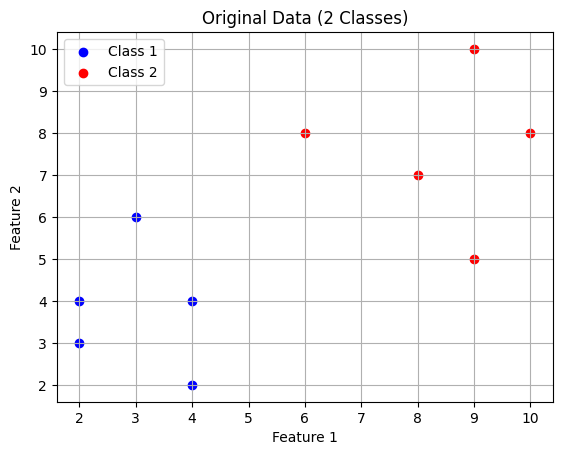

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Two classes of data
class1 = np.array([[4, 2],
                   [2, 4],
                   [2, 3],
                   [3, 6],
                   [4, 4]])

class2 = np.array([[9, 10],
                   [6, 8],
                   [9, 5],
                   [8, 7],
                   [10, 8]])

# Stack into one dataset
X = np.vstack((class1, class2))
y = np.array([0]*len(class1) + [1]*len(class2))  # labels

# Visualize
plt.scatter(class1[:,0], class1[:,1], color='blue', label='Class 1')
plt.scatter(class2[:,0], class2[:,1], color='red', label='Class 2')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (2 Classes)")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
mean_vectors = []
for cl in [0,1]:
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print(f"Mean vector for class {cl}: {mean_vectors[cl]}")


Mean vector for class 0: [3.  3.8]
Mean vector for class 1: [8.4 7.6]


In [3]:
n_features = X.shape[1]
SW = np.zeros((n_features, n_features))

for cl, mv in zip([0,1], mean_vectors):
    class_scatter = np.zeros((n_features, n_features))
    for row in X[y==cl]:
        row, mv = row.reshape(n_features,1), mv.reshape(n_features,1)
        class_scatter += (row - mv).dot((row - mv).T)
    SW += class_scatter

print("Within-class scatter matrix SW:\n", SW)


Within-class scatter matrix SW:
 [[13.2 -1.2]
 [-1.2 22. ]]


In [4]:
overall_mean = np.mean(X, axis=0).reshape(n_features,1)
SB = np.zeros((n_features, n_features))

for cl, mv in zip([0,1], mean_vectors):
    n = X[y==cl,:].shape[0]
    mv = mv.reshape(n_features,1)
    SB += n * (mv - overall_mean).dot((mv - overall_mean).T)

print("Between-class scatter matrix SB:\n", SB)


Between-class scatter matrix SB:
 [[72.9 51.3]
 [51.3 36.1]]


In [5]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(SW).dot(SB))

print("Eigenvalues:\n", eig_vals)
print("Eigenvectors:\n", eig_vecs)


Eigenvalues:
 [ 7.62541528e+00 -2.22044605e-16]
Eigenvectors:
 [[ 0.90878558 -0.57549341]
 [ 0.41726342  0.81780642]]


In [6]:
sorted_indices = np.argsort(abs(eig_vals))[::-1]
eig_vecs = eig_vecs[:, sorted_indices]
eig_vals = eig_vals[sorted_indices]

# Pick top 1 for 2-class LDA
W = eig_vecs[:, :1]
print("Linear Discriminant (W):\n", W)


Linear Discriminant (W):
 [[0.90878558]
 [0.41726342]]


In [7]:
X_lda = X.dot(W)

print("Transformed Data (1D):\n", X_lda[:5])


Transformed Data (1D):
 [[4.46966918]
 [3.48662485]
 [3.06936143]
 [5.22993727]
 [5.30419602]]


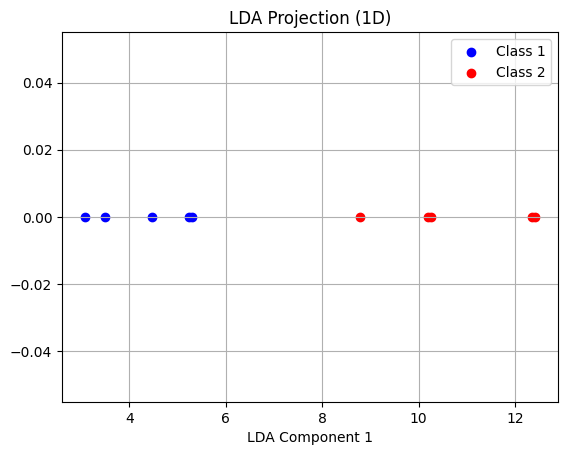

In [10]:
# Plot projected values on 1D axis (clean)
plt.scatter(X_lda[y==0], [0]*len(class1), color='blue', label='Class 1')
plt.scatter(X_lda[y==1], [0]*len(class2), color='red', label='Class 2')

plt.xlabel("LDA Component 1")
plt.title("LDA Projection (1D)")
plt.legend()
plt.grid(True)
plt.show()


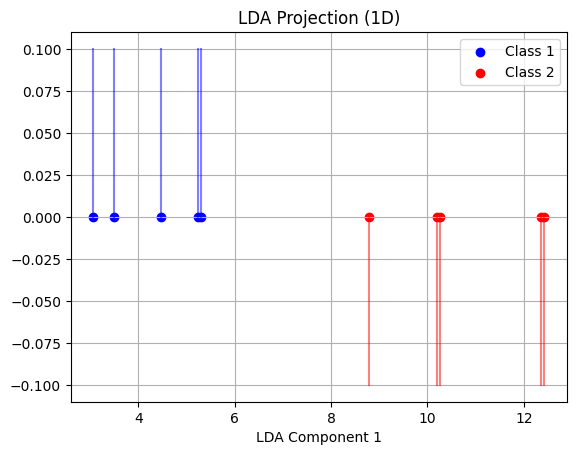

In [9]:
# Plot projected values on 1D axis
plt.scatter(X_lda[y==0], [0]*len(class1), color='blue', label='Class 1')
plt.scatter(X_lda[y==1], [0]*len(class2), color='red', label='Class 2')

# Add vertical lines to show spread
for val in X_lda[y==0]:
    plt.plot([val, val], [0, 0.1], color='blue', alpha=0.5)
for val in X_lda[y==1]:
    plt.plot([val, val], [0, -0.1], color='red', alpha=0.5)

plt.xlabel("LDA Component 1")
plt.title("LDA Projection (1D)")
plt.legend()
plt.grid(True)
plt.show()
